In [1]:
import random

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 15
batch_size = 100

In [7]:
mnist_train = dsets.MNIST(
    root="../input", train=True, transform=transforms.ToTensor(), download=True
)
mnist_test = dsets.MNIST(
    root="../input", train=False, transform=transforms.ToTensor(), download=True
)

drop_last를 하는 이유를 이해하기 위해 1000개의 데이터가 있을 때 배치 크기가 128이라고 해보자. 이렇게 하면 마지막 배치 크기는 104이다. 이 배치를 그냥 사용 시에 다른 미니배치보다 개수가 적은 마지막 미니배치가 상대적으로 과대평가될 수 있다.

In [8]:
data_loader = DataLoader(
    dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True
)

In [9]:
linear = nn.Linear(784, 10).to(device)

In [10]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [12]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        y = y.to(device)

        hypothesis = linear(X)

        optimizer.zero_grad()
        cost = criterion(hypothesis, y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print(f"Epoch: {epoch + 1:04d} cost={avg_cost:.9f}")

print("Learning finished")

Epoch: 0001 cost=0.535701573
Epoch: 0002 cost=0.359403193
Epoch: 0003 cost=0.331129968
Epoch: 0004 cost=0.316610843
Epoch: 0005 cost=0.307287753
Epoch: 0006 cost=0.300151169
Epoch: 0007 cost=0.295128852
Epoch: 0008 cost=0.290526152
Epoch: 0009 cost=0.287431419
Epoch: 0010 cost=0.284428835
Epoch: 0011 cost=0.281726122
Epoch: 0012 cost=0.279582173
Epoch: 0013 cost=0.277621865
Epoch: 0014 cost=0.275999993
Epoch: 0015 cost=0.274319857
Learning finished


Accuracy: 0.8833000063896179
Label: 8
Prediction: 8


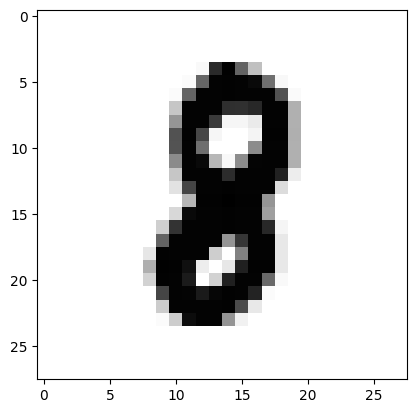

In [24]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    pred = linear(X_test)
    correct_pred = torch.argmax(pred, dim=1) == y_test
    accuracy = correct_pred.float().mean()
    print(f"Accuracy: {accuracy.item()}")

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r : r + 1].view(-1, 28 * 28).float().to(device)
    y_single_data = mnist_test.test_labels[r : r + 1].to(device)

    print(f"Label: {y_single_data.item()}")
    single_pred = linear(X_single_data)
    print(f"Prediction: {torch.argmax(single_pred, 1).item()}")

    plt.imshow(
        mnist_test.test_data[r : r + 1].view(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()